In [92]:
from fastai.basics import *
from fastai.vision import models
from fastai.vision.all import *
from fastai.metrics import *
from fastai.data.all import *
from fastai.callback import *

# SemTorch
from semtorch import get_segmentation_learner

from pathlib import Path
import random

In [93]:
%matplotlib inline
import numpy as np



Function por stablishing the seed for reproducibility


In [94]:
number_of_the_seed = 2020

random.seed(number_of_the_seed)
set_seed(number_of_the_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

# HRNet

model = torch.jit.load("deeplab.pth")
model = model.cpu()
model.eval()


RecursiveScriptModule(
  original_name=DeepLabV3Plus
  (backbone): RecursiveScriptModule(
    original_name=ResNetV1
    (conv1): RecursiveScriptModule(original_name=Conv2d)
    (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
    (relu): RecursiveScriptModule(original_name=ReLU)
    (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
    (layer1): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(
        original_name=BottleneckV1b
        (conv1): RecursiveScriptModule(original_name=Conv2d)
        (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
        (conv2): RecursiveScriptModule(original_name=Conv2d)
        (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
        (conv3): RecursiveScriptModule(original_name=Conv2d)
        (bn3): RecursiveScriptModule(original_name=BatchNorm2d)
        (relu): RecursiveScriptModule(original_name=ReLU)
        (downsample): RecursiveScriptModule(
          original_name=Sequential

In [96]:
import torchvision.transforms as transforms
def transform_image(image):
    my_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image_aux = image
    return my_transforms(image_aux).unsqueeze(0).to(device)

In [107]:
path = Path('dataset/semi/')

In [115]:
for file in path.ls():
    image = Image.open(file)
    image = transforms.Resize((480,640))(image)
    tensor = transform_image(image=image)
    model.to(device)
    with torch.no_grad():
        outputs = model(tensor)
    outputs = torch.argmax(outputs,1)
    mask = np.array(outputs.cpu())
    mask[mask==4]=255
    mask[mask==1]=150
    mask[mask==3]=76
    mask[mask==2]=29
    mask=np.reshape(mask,(480*640))
    new  = np.zeros((480*640,3),dtype='uint8')

    for i,v in enumerate(mask):
        if(v==150):
            new[i]=[0,255,0]
        if(v==76):
            new[i]=[255,0,0]
        if(v==29):
            new[i]=[0,0,255]
        if(v==0 or v==255):
            new[i]=[v,v,v]


    maskRGBShow = Image.fromarray(np.reshape(new,(480,640,3)))
    maskRGBShow.save('dataset/dataset/Labels/trainSemi/gt'+file.name.replace('color','').replace('.jpg','.png'))
    
    
    
    
    

In [69]:
image = Image.open('dataset/semi/color00247.jpg')

In [70]:
image = transforms.Resize((480,640))(image)
tensor = transform_image(image=image)

In [71]:
model.to(device)
with torch.no_grad():
    outputs = model(tensor)

outputs = torch.argmax(outputs,1)

In [72]:
mask = np.array(outputs.cpu())

In [73]:
mask[mask==4]=255
mask[mask==1]=150
mask[mask==3]=76
mask[mask==2]=29

In [74]:
mask=np.reshape(mask,(480,640))

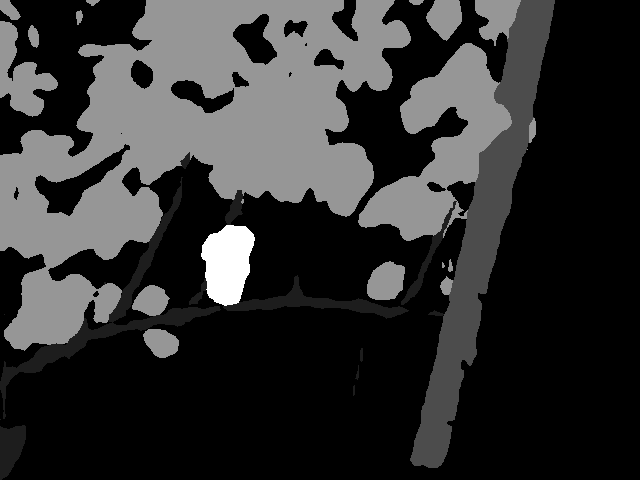

In [75]:
maskShow = Image.fromarray(mask.astype('uint8'))
maskShow

In [76]:
temp = np.reshape(np.array(maskShow),(480*640))

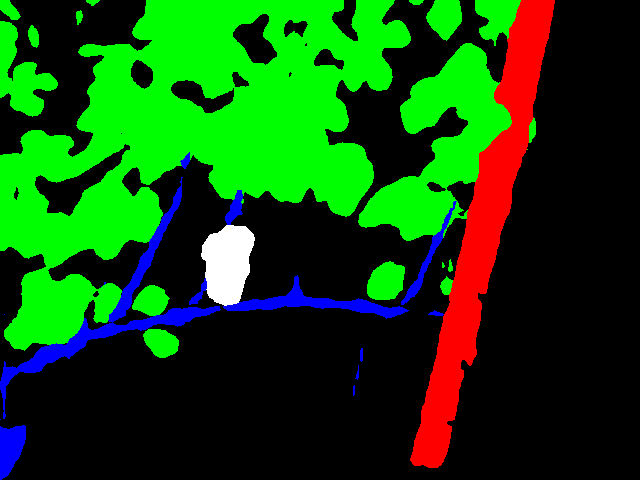

In [77]:
new  = np.zeros((480*640,3),dtype='uint8')

for i,v in enumerate(temp):
    if(v==150):
        new[i]=[0,255,0]
    if(v==76):
        new[i]=[255,0,0]
    if(v==29):
        new[i]=[0,0,255]
    if(v==0 or v==255):
        new[i]=[v,v,v]
    

maskRGBShow = Image.fromarray(np.reshape(new,(480,640,3)))
maskRGBShow

In [43]:
maskRGBShow.save('deeplab_pred_155.jpg')